<a href="https://colab.research.google.com/github/opherdonchin/Regression-by-group/blob/main/Regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I built this using the outline in this page: [Bayesian Linear Regression Using PyMC3](https://ostwalprasad.github.io/machine-learning/Bayesian-Linear-Regression-using-PyMC3.html)

In [ ]:
!pip install pymc3
!pip install seaborn
!pip install arviz

In [ ]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import arviz as az
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder


In [ ]:
# url_impl_trials = 'https://raw.githubusercontent.com/opherdonchin/Regression-by-group/main/dataExplicit.csv'
# url_expl_trials = 'https://raw.githubusercontent.com/opherdonchin/Regression-by-group/main/dataExplicit.csv'
# url_impl = 'https://raw.githubusercontent.com/opherdonchin/Regression-by-group/main/implAndAfter_NoLandmarks.csv'
# url_expl = 'https://raw.githubusercontent.com/opherdonchin/Regression-by-group/main/implAndAfter_NoLandmarks.csv'
url_landmarks = 'https://raw.githubusercontent.com/opherdonchin/Regression-by-group/main/data/dataLandmarks.csv'
url_no_landmarks = 'https://raw.githubusercontent.com/opherdonchin/Regression-by-group/main/data/dataNoLandmarks.csv'


landmark_data = pd.read_csv(url_landmarks, sep=",", on_bad_lines='skip')
no_landmark_data = pd.read_csv(url_no_landmarks, sep=",", on_bad_lines='skip')

In [ ]:
landmark_data.head()

,eyeHandDiff,eyes,afterEffect,subjectN,groups
0,10.082297,-31.546520,-8.875644,1,1
1,-10.012122,-27.271097,-3.625990,1,1
2,-33.441301,14.607681,-15.002860,1,1
3,-95.241374,57.084439,-11.144006,1,1
4,-121.630474,99.886312,-17.726672,1,1


In [ ]:
print('Running on the PyMC3 v{}'.format(pm.__version__))


Running on the PyMC3 v3.11.4


In [ ]:
def homogeneuos_model(y,x,s):
  ord_enc = OrdinalEncoder()
  s_code = ord_enc.fit_transform(s)
  num_s = len(np.unique(s_code))
  with pm.Model() as model:
    #Priors
    xs = pm.Normal('xs', mu=0, sd=30, testval=0.0, shape=num_s)
    ys = pm.Normal('yx', mu=0, sd=30, testval=0.0, shape=num_s)
    beta = pm.Normal('beta', mu=0, sd=10, testval=0.0)
    sigma = pm.HalfNormal('sigma', sd=1, testval=1)
    # Deterministics
    mu = beta*x
    # Likelihood 
    Yobs = pm.Normal('Yobs', mu=mu, sd=sigma, observed=y)    
  return model



In [ ]:
def intercept_model(y,x):
  with pm.Model() as model:
      #Priors
      beta = pm.Normal('beta', mu=0, sd=10, testval=0.0)
      beta0 = pm.Normal('beta0', mu=0, sd=5, testval=0.0) 
      sigma = pm.HalfNormal('sigma', sd=1, testval=1)
      # Deterministics
      mu = beta*x + beta0
      # Likelihood 
      Yobs = pm.Normal('Yobs', mu=mu, sd=sigma, observed=y)    
  return model


In [ ]:
all_indexes = [impl_data["Group"] == 1, impl_data["Group"] == 2, expl_data["Group"] == 1, expl_data["Group"] == 2]
all_data_name = ['Implicit Graoup 1', 'Implicit Group 2', 'Explicit Group 1', 'Explicit Group 2']
all_data = [impl_data, impl_data, expl_data, expl_data]
all_x0 = [0, 0, -30, -30]
all_y0 = [0, 0, 0, 0]

all_x = list()
all_y = list()
for group_index, data in zip(all_indexes, all_data):
  all_x.append(data.loc[group_index, "Eye"])
  all_y.append(data.loc[group_index, "Aftereffect"])


In [ ]:
all_model_def = [homogeneuos_model, intercept_model]
all_model_name = ['Homogeneous', 'Intercept']
all_model = [[] for _ in all_model_def]
all_trace = [[] for _ in all_model_def]
all_az = [[] for _ in all_model_def]

for i, model_def in enumerate(all_model_def):
  for x,y,x0,y0 in zip(all_x, all_y, all_x0, all_y0):
    mod = model_def(x-x0,y-y0)
    with mod:
      trace = pm.sample(draws=10000)
    all_model[i].append(mod) 
    all_trace[i].append(trace)
    all_az[i].append(az.from_pymc3(model=mod, trace=trace))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 33 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 14 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 14 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 14 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta0, beta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 19 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta0, beta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 18 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta0, beta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 19 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta0, beta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 15 seconds.


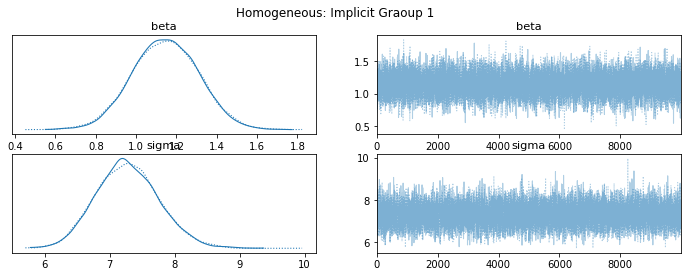

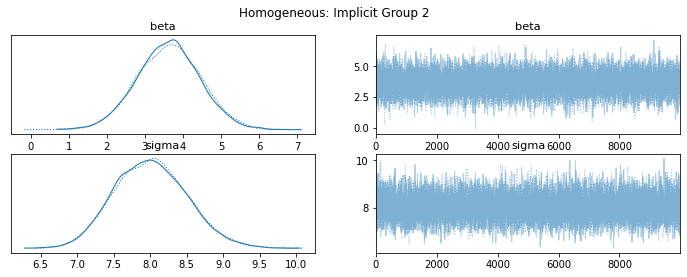

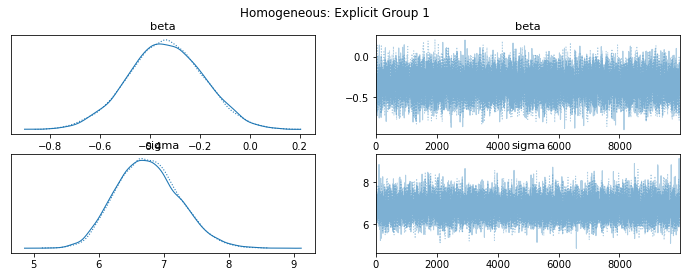

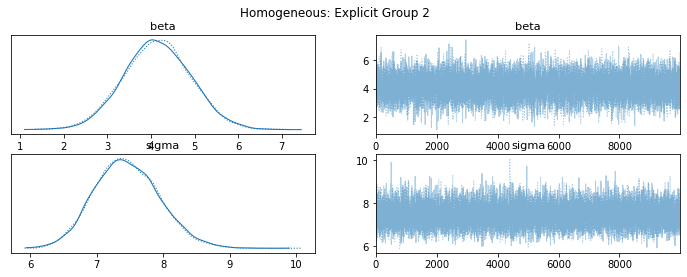

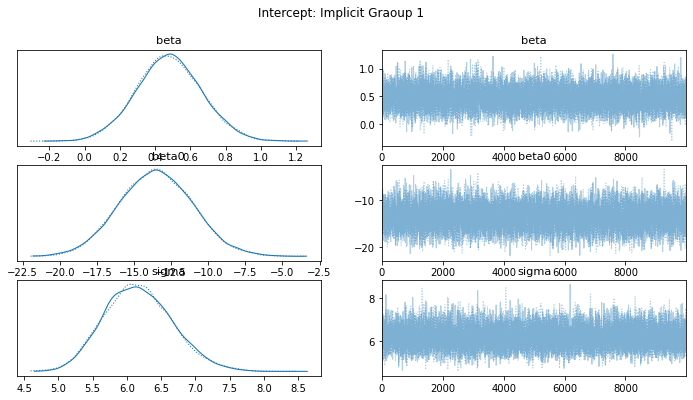

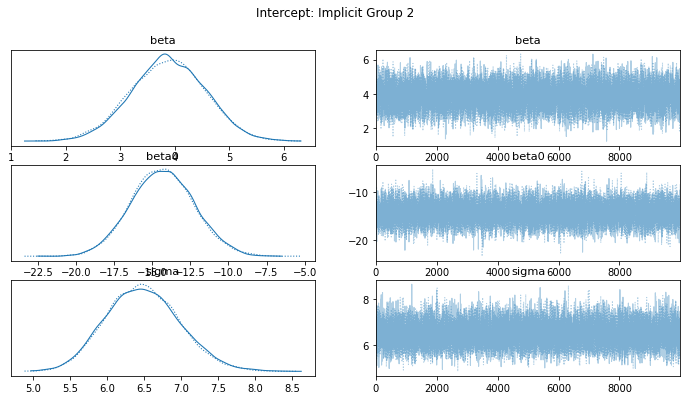

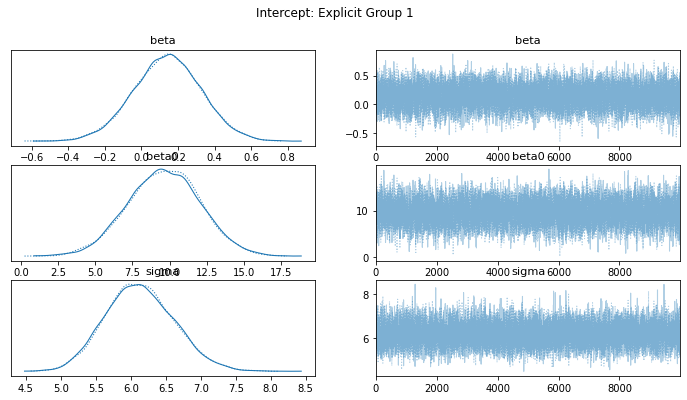

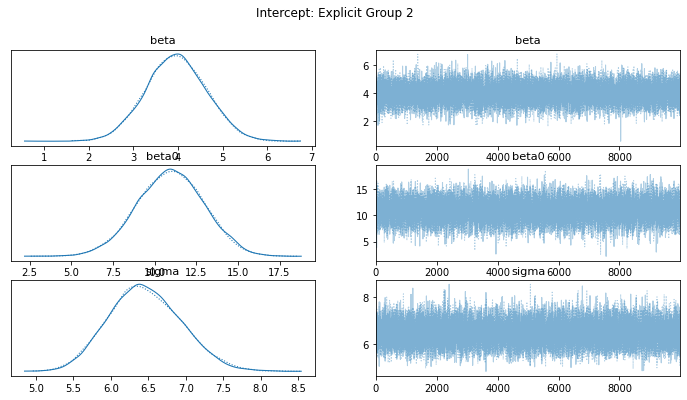

In [ ]:
for model_name,these_az in zip(all_model_name, all_az):
  for data_name,trace in zip(all_data_name,these_az):
    ax = az.plot_trace(trace)
    ax[0][0].get_figure().suptitle(f'{model_name}: {data_name}')

In [ ]:
for model_name,these_az in zip(all_model_name, all_az):
  for data_name,trace in zip(all_data_name, these_az):
    print(f'{model_name}: {data_name}')
    print(pm.summary(trace).round(2))

Homogeneous: Implicit Graoup 1
       mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta   1.15  0.16    0.85     1.46        0.0      0.0   18400.0   13398.0   
sigma  7.28  0.48    6.38     8.19        0.0      0.0   16749.0   13788.0   

       r_hat  
beta     1.0  
sigma    1.0  
Homogeneous: Implicit Group 2
       mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta   3.62  0.83    2.02     5.13       0.01      0.0   16855.0   13535.0   
sigma  8.01  0.50    7.08     8.92       0.00      0.0   16873.0   13550.0   

       r_hat  
beta     1.0  
sigma    1.0  
Homogeneous: Explicit Group 1
       mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta  -0.34  0.15   -0.64    -0.06        0.0      0.0   18081.0   14508.0   
sigma  6.76  0.49    5.88     7.66        0.0      0.0   16975.0   13625.0   

       r_hat  
beta     1.0  
sigma    1.0  
Homogeneous: Explicit Group 2
       mean    sd  hdi_3%  hdi_97%  mcs

In [ ]:
for i, data_name in enumerate(all_data_name):
  print(data_name)
  comparison = az.compare({all_model_name[0]: all_az[0][i], all_model_name[1]: all_az[1][i]}, ic='waic')
  print(comparison)


Implicit Graoup 1
             rank       waic    p_waic    d_waic    weight         se  \
Intercept       0 -56.364098  8.683702  0.000000  0.801962  11.082864   
Homogeneous     1 -63.594664  5.728891  7.230566  0.198038  11.168277   

                   dse  warning waic_scale  
Intercept     0.000000     True        log  
Homogeneous  11.958267     True        log  
Implicit Group 2
             rank       waic     p_waic     d_waic    weight         se  \
Intercept       0 -56.750349  10.689212   0.000000  0.799871  11.764333   
Homogeneous     1 -68.464363   8.754192  11.714014  0.200129  14.631577   

                   dse  warning waic_scale  
Intercept     0.000000     True        log  
Homogeneous  11.402208     True        log  
Explicit Group 1


/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1663: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "
/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1663: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "
/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1663: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterio

             rank       waic    p_waic    d_waic    weight         se  \
Intercept       0 -56.119141  8.736597  0.000000  0.695199  14.536221   
Homogeneous     1 -60.459970  7.700174  4.340829  0.304801  17.381053   

                  dse  warning waic_scale  
Intercept    0.000000     True        log  
Homogeneous  5.543202     True        log  
Explicit Group 2
             rank       waic     p_waic    d_waic    weight         se  \
Intercept       0 -57.072959  11.400130  0.000000  0.734796  11.841936   
Homogeneous     1 -65.618107  11.839835  8.545148  0.265204  15.275829   

                   dse  warning waic_scale  
Intercept     0.000000     True        log  
Homogeneous  10.720883     True        log  


/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1663: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "
/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1663: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "
